In [1]:
#https://medium.com/@jaems33/understanding-kalman-filters-with-python-2310e87b8f48
#https://www.kaggle.com/jigneshjokhakar1/fast-processing-kalman-filter-vs-arima-model
#https://filterpy.readthedocs.io/en/latest/kalman/KalmanFilter.html

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from math import sqrt
import seaborn as sns

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#data = pd.read_csv('./input/shampoo.csv', header=0, index_col=0).fillna(0)
data = pd.read_csv('p16_steps.csv', header=0, index_col=0).fillna(0)
data.head()

,steps
timestamp,
11/1/2019,3062
11/2/2019,1472
11/3/2019,610
11/4/2019,2177
11/5/2019,1690


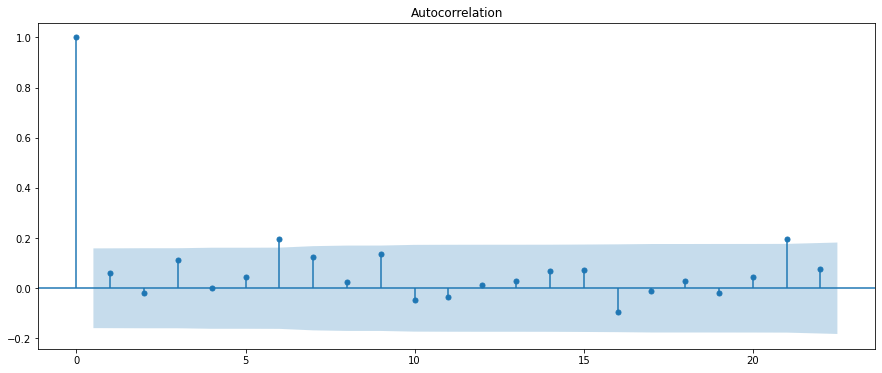

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data)
plt.show()

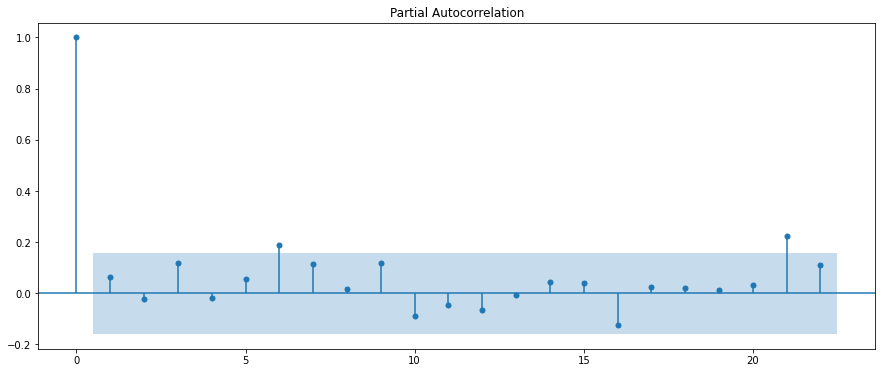

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data)
plt.show()

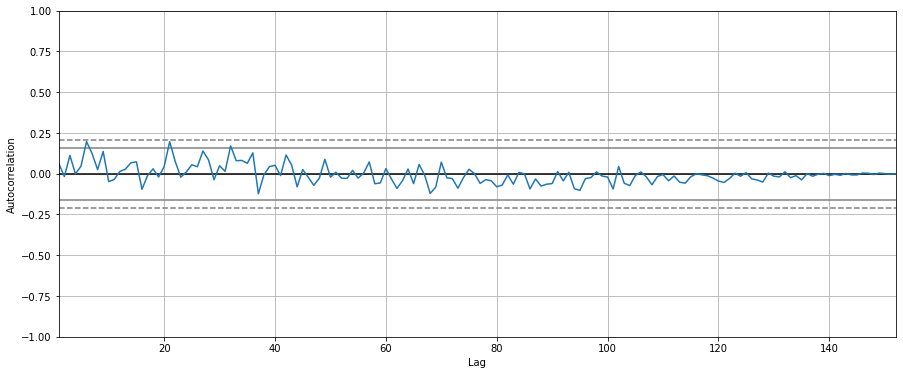

In [6]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data)
plt.show()

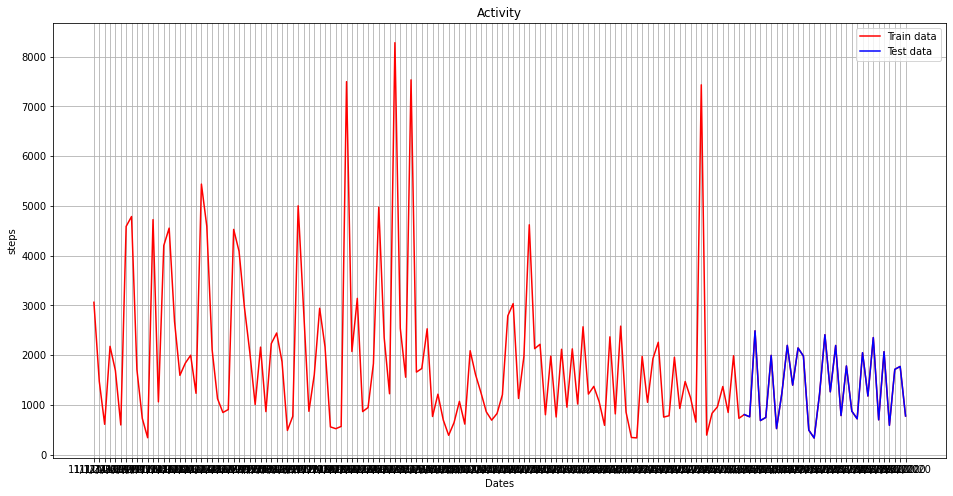

In [7]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('steps')
plt.plot(data['steps'], 'red', label='Train data')
plt.plot(test_data['steps'], 'blue', label='Test data')
plt.legend()
plt.title('Activity')
plt.show()

In [8]:
train = train_data['steps']
test = test_data['steps']

MSE: 4117579.8378378376
MAE: 1356.8648648648648
RMSE: 2029.1820612842598
Time elapsed:0.007626056671142578 s


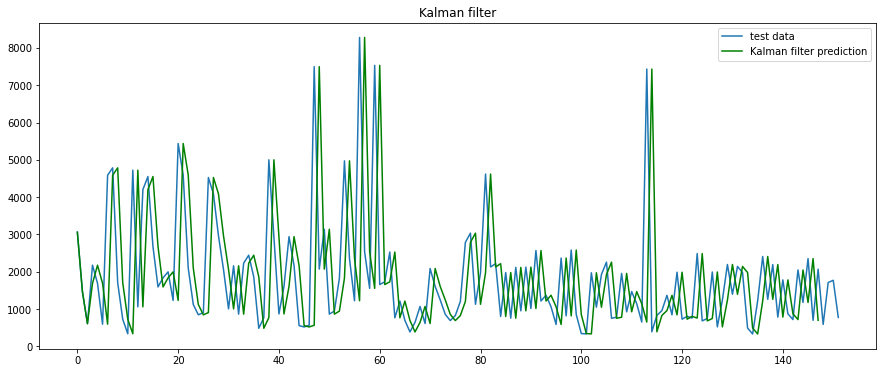

In [9]:
#Kalman filter

import time

start = time.time()

test_dataa=data['steps'].values
#test_dataa=train.values
#test_dataa=test.values

n1 = 10
n2 = 7

A=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
const=0
P_init=[[n1**-n2,0,0,0],[0,n1**-n2,0,0],[0,0,n1**-n2,0],[0,0,0,n1**-n2]]
R=[[n1**-n2,0,0,0],[0,n1**-n2,0,0],[0,0,n1**-n2,0],[0,0,0,n1**-n2]]
Q=[[n1**-n2,0,0,0],[0,n1**-n2,0,0],[0,0,n1**-n2,0],[0,0,0,n1**-n2]]

KF=[]

update=[]

KF.append(test_dataa[0])
KF.append(test_dataa[1])
KF.append(test_dataa[2])
KF.append(test_dataa[4])

for i in range(4,len(test_dataa)-4):
    x_init=[[test_dataa[i-4]],[test_dataa[i-3]],[test_dataa[i-2]],[test_dataa[i-1]]]
    #prediction
    #print(i)
    prediction=np.dot(A,x_init)+const
    #print(x_min[1])
    P_min=np.dot(np.dot(A,P_init),A)+Q
    KF.append(prediction[3].tolist()[0])
    #measurement update
    y_min=prediction[3]
    #print(y_min)
    P_y_min=P_min+R
    K_gain=np.dot(P_min,np.linalg.inv(P_y_min))[3][3]
    #print(K_gain)
    x_init=prediction-K_gain*(y_min-test_dataa[i])
    update.append(x_init)
    #x_init=np.array([])
    #print(x_init)
    P_init=P_min-K_gain*P_min
    
#print(KF[0:10])   
#print(test_dataa[0:10])
#df['KF']=KF

mse = mean_squared_error(KF, test_dataa[0:len(test_dataa)-4])
print('MSE: '+str(mse))
mae = mean_absolute_error(KF, test_dataa[0:len(test_dataa)-4])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(KF, test_dataa[0:len(test_dataa)-4]))
print('RMSE: '+str(rmse))

end = time.time()

elapsed = end - start
print("Time elapsed:" +str(elapsed)+" s")

plt.plot(test_dataa,label='test data')
plt.plot(KF,'green',label='Kalman filter prediction')
plt.title('Kalman filter')
plt.legend()
plt.show()

#print(len(KF))
#print(len(train_arima))